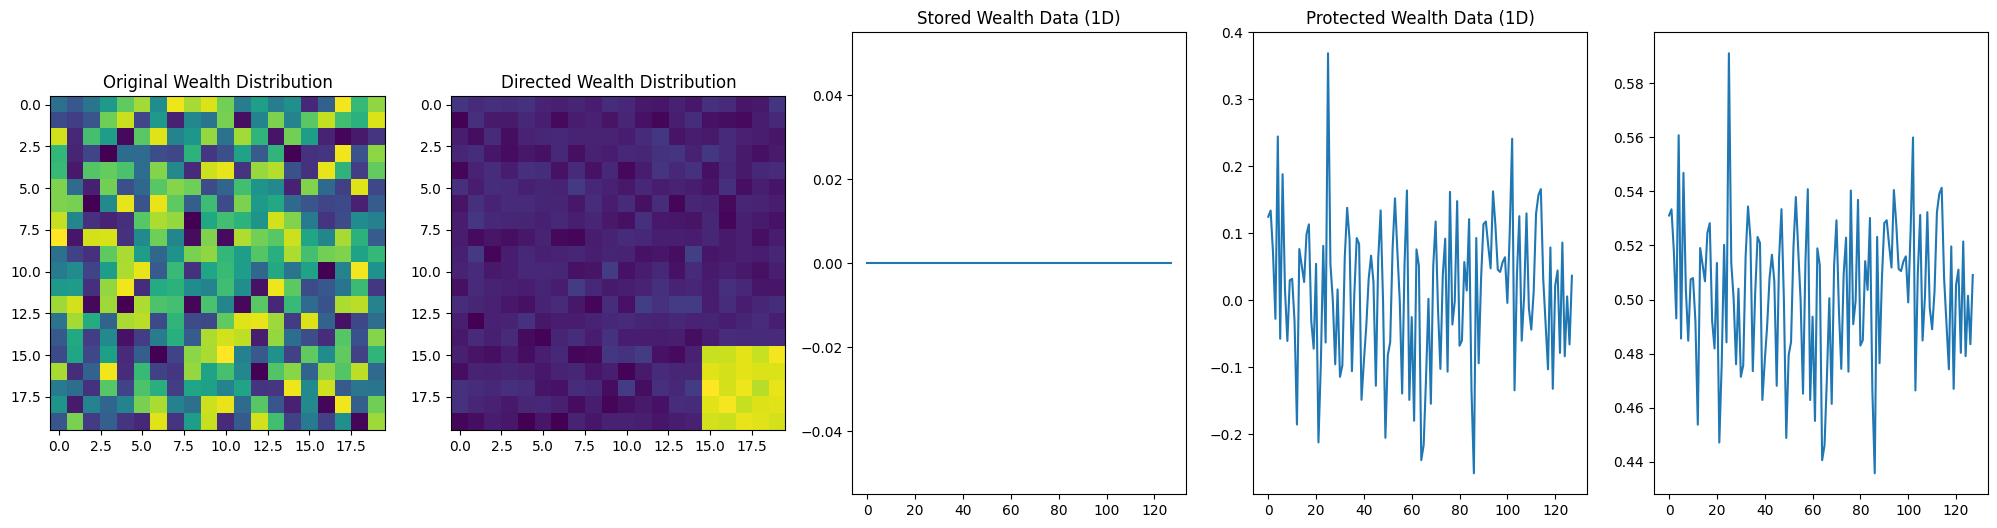

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define grid size
grid_size = 20

# Create a grid with random initial wealth data
wealth_data = torch.rand((grid_size, grid_size))

# Define a neural network with an additional layer for data protection
class WealthNet(nn.Module):
    def __init__(self):
        super(WealthNet, self).__init__()
        self.fc1 = nn.Linear(grid_size * grid_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, grid_size * grid_size)
        self.infrared_layer = nn.Sigmoid()  # Simulating the conversion to infrared energy
        # Removed the incorrect instantiation of GaussianNoise here

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        stored_wealth = torch.relu(self.fc2(x))  # Store wealth data here
        protected_wealth = self.protection_layer(stored_wealth)  # Protect the stored data
        infrared_energy = self.infrared_layer(protected_wealth)  # Convert to infrared energy
        x = self.fc3(infrared_energy)
        return x, stored_wealth, protected_wealth, infrared_energy

# Custom layer to add Gaussian noise (PyTorch does not have this built-in)
class GaussianNoise(nn.Module):
    def __init__(self, stddev):
        super(GaussianNoise, self).__init__()
        self.stddev = stddev

    def forward(self, x):
        if self.training:
            noise = torch.randn_like(x) * self.stddev
            return x + noise
        return x

# Instantiate the network, loss function, and optimizer
net = WealthNet()
# Add the GaussianNoise layer to the network instance
net.protection_layer = GaussianNoise(0.1)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Target direction to direct wealth (e.g., bottom right corner)
target_wealth = torch.zeros((grid_size, grid_size))
target_wealth[-5:, -5:] = 1  # Direct wealth towards the bottom right corner

# Convert the grid to a single vector for the neural network
input_data = wealth_data.view(-1)
target_data = target_wealth.view(-1)

# Training the network
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    output, stored_wealth, protected_wealth, infrared_energy = net(input_data)
    loss = criterion(output, target_data)
    loss.backward()
    optimizer.step()

# Reshape the outputs to the grid size
output_grid = output.detach().view(grid_size, grid_size)
stored_wealth_grid = stored_wealth.detach().view(128)  # Displayed as a 1D representation
protected_wealth_grid = protected_wealth.detach().view(128)  # Displayed as a 1D representation
infrared_energy_grid = infrared_energy.detach().view(128)  # Displayed as a 1D representation

# Plot the original and adjusted wealth distribution
fig, axes = plt.subplots(1, 5, figsize=(25, 6))
axes[0].imshow(wealth_data, cmap='viridis')
axes[0].set_title('Original Wealth Distribution')
axes[1].imshow(output_grid, cmap='viridis')
axes[1].set_title('Directed Wealth Distribution')
axes[2].plot(stored_wealth_grid.numpy())
axes[2].set_title('Stored Wealth Data (1D)')
axes[3].plot(protected_wealth_grid.numpy())
axes[3].set_title('Protected Wealth Data (1D)')
axes[4].plot(infrared_energy_grid)